<a href="https://colab.research.google.com/github/juliorodrigues07/LH_CD_JULIORODRIGUES/blob/extras/notebooks/2_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

##[Table of Contents](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=g-cc_ygMBtaS)

>[Imports and Constants](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=--pM5oz0AUyZ)

>[1. Statistical Impressions](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=ZF0lEbrq2lCV)

>[2. Optimizing Memory](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=2ryhw57Q-lHb)

>[3. Discarding Columns and Feature's Cardinality](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=yoS2Ho2T_cCy)

>[4. Missing Values](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=S3y62aFSDpj_)

>>[4.1. Encoding Features and Scaling](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=fAvxHRx0EvGW)

>>[4.2. Inputting with Machine Learning](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=kj73H4iyFA0i)

>[5. Outliers and Binning](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=9niCIN4EQ2ZM)

>[6. Revisiting the Correlation Matrix](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=blQQWF9Z8jGk)

>[7. Storing Encodings for Predictions](#scrollTo=FOF_3ZAsSU2V)



# **Imports and Defining Some Constants**

In [1]:
from warnings import filterwarnings
from os.path import isdir
from os import getcwd
from os import mkdir
import pandas as pd
import gdown


filterwarnings('ignore', category=DeprecationWarning)
filterwarnings('ignore', category=FutureWarning)

# Maximum and minimum int32 bounds
MAX_BOUND = pow(2, 31) - 1
MIN_BOUND = - pow(2, 31)

# Export directories
if not isdir(f'{getcwd()}/../plots'):
    mkdir(f'{getcwd()}/../plots')
if not isdir(f'{getcwd()}/../models'):
    mkdir(f'{getcwd()}/../models')
if not isdir(f'{getcwd()}/../datasets'):
    mkdir(f'{getcwd()}/../datasets')

# **1. First Statistical Impressions of the Dataset**

- In relation to the columns:

    - {Price, Reviews, Minimum Nights} have heavy outliers;
    - {ID, Name} have a large amount of unique values (possibly irrelevant information to the model -> low predictive power);
    - {Host Name, Last Review, Monthly Reviews} have a reasonable amount of missing values, which can be imputed with classical strategies (e.g., mean, median, ...) or with a ML algorithm as an intermediate;
    - {ID, Host ID, Price, Minimum Nights, Reviews, Number of Listings, Days Available} can be downcasted from *int64* to *int32* or even *int16* to save memory space;
    - {Latitude, Longitude, Monthly Reviews} can be downcasted from *float64* to *float32* to save memory space;
    - {Host Name, Neighborhood, District, Room Type, Last Review} can be changed from type *object* to *category* to save memory space (relatively low amount of unique values).

In [2]:
# dataset = pd.read_csv(f'{getcwd()}/../datasets/pricing.csv')

output_file = "pricing.csv"
file_id = '1j8lxdtKR5ELOl6ksapQwzribYchz-0UG'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file)
dataset = pd.read_csv(output_file)

dataset = dataset.rename(columns={
    'id': 'ID',
    'nome': 'Name',
    'host_id': 'Host ID',
    'host_name': 'Host Name',
    'bairro_group': 'Borough',
    'bairro': 'District',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'room_type': 'Room Type',
    'price': 'Price',
    'minimo_noites': 'Minimum Nights',
    'numero_de_reviews': 'Reviews',
    'ultima_review': 'Last Review',
    'reviews_por_mes': 'Monthly Reviews',
    'calculado_host_listings_count': 'Number of Listings',
    'disponibilidade_365': "Days Available"
})

features = dataset.columns.values
dataset.info()

Downloading...
From: https://drive.google.com/uc?id=1j8lxdtKR5ELOl6ksapQwzribYchz-0UG
To: /content/pricing.csv
100%|██████████| 7.08M/7.08M [00:00<00:00, 29.5MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  48894 non-null  int64  
 1   Name                48878 non-null  object 
 2   Host ID             48894 non-null  int64  
 3   Host Name           48873 non-null  object 
 4   Borough             48894 non-null  object 
 5   District            48894 non-null  object 
 6   Latitude            48894 non-null  float64
 7   Longitude           48894 non-null  float64
 8   Room Type           48894 non-null  object 
 9   Price               48894 non-null  int64  
 10  Minimum Nights      48894 non-null  int64  
 11  Reviews             48894 non-null  int64  
 12  Last Review         38842 non-null  object 
 13  Monthly Reviews     38842 non-null  float64
 14  Number of Listings  48894 non-null  int64  
 15  Days Available      48894 non-null  int64  
dtypes: f

- There are no duplicated rows. Finding no redundancy in the dataset is a positive, since we can skip the process of eliminating it;
- ML algorithms benefits from finding punctual patterns, not pure redundancy.

In [ ]:
print(f'Duplicated rows: {dataset.duplicated().sum()}')

Duplicated rows: 0


In [ ]:
for feat in features:
    if dataset[feat].dtype == int or dataset[feat].dtype == float:
        print(dataset[feat].describe())
        print()

count    4.889400e+04
mean     1.901753e+07
std      1.098288e+07
min      2.595000e+03
25%      9.472371e+06
50%      1.967743e+07
75%      2.915225e+07
max      3.648724e+07
Name: ID, dtype: float64

count    4.889400e+04
mean     6.762139e+07
std      7.861118e+07
min      2.438000e+03
25%      7.822737e+06
50%      3.079553e+07
75%      1.074344e+08
max      2.743213e+08
Name: Host ID, dtype: float64

count    48894.000000
mean        40.728951
std          0.054529
min         40.499790
25%         40.690100
50%         40.723075
75%         40.763117
max         40.913060
Name: Latitude, dtype: float64

count    48894.000000
mean       -73.952169
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936273
max        -73.712990
Name: Longitude, dtype: float64

count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.00000

In [ ]:
print(dataset.nunique())
print()
print(dataset.isnull().sum())

ID                    48894
Name                  47904
Host ID               37457
Host Name             11452
Borough                   5
District                221
Latitude              19048
Longitude             14718
Room Type                 3
Price                   674
Minimum Nights          109
Reviews                 394
Last Review            1764
Monthly Reviews         937
Number of Listings       47
Days Available          366
dtype: int64

ID                        0
Name                     16
Host ID                   0
Host Name                21
Borough                   0
District                  0
Latitude                  0
Longitude                 0
Room Type                 0
Price                     0
Minimum Nights            0
Reviews                   0
Last Review           10052
Monthly Reviews       10052
Number of Listings        0
Days Available            0
dtype: int64


# **2. Optimizing Memory Space**

- Although the dataset has a small size, real applications tends to deal with much larger datasets, which could difficult their management depending on the amount of memory available;
- Therefore, it may be needed to apply some memory optimization techniques to reduce the dataset size and make it more manageable at different environments;
- Numerical columns, for instance, can be downcasted to occupy a lower amount of memory, if its values range can be coerced to a smaller representation (e.g., 64 bits -> 32 bits);
- The columns {ID, Host ID, Price, Minimum Nights, Reviews, Number of Listings, Days Available} were downcasted from *int64* to *int32* or *int16*;
- The columns {Latitude, Longitude, Monthly Reviews} were downcasted from *float64* to *float32*;
- The columns {Host Name, Neighborhood, District, Room Type, Last Review} were changed from type *object* to *category*;
- *Name* column type wasn't changed, since it has a large amount of unique values. Changing its type could not reduce the dataset size and possibly enlarge it.

In [3]:
def optimize_memory(df: pd.DataFrame, object_cols: list=[],
                    downcast_float: bool=False, in_place: bool=False) -> any:

    if not in_place:
        df = df.copy()

    int_cols = df.select_dtypes(include=['int']).columns
    for col in int_cols:
        if df[col].max() < MAX_BOUND and df[col].min() > MIN_BOUND:
            df[col] = df[[col]].apply(pd.to_numeric, downcast='integer')

    if downcast_float:
        float_cols = df.select_dtypes(include=['float']).columns
        df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')

    for col in object_cols:
        if col in df.columns and df[col].dtype == 'object':
            df[col] = df[col].astype('category')

    if in_place:
        return None
    else:
        return df

In [4]:
memory = dataset.memory_usage(deep=True)
print(f'Raw dataset: {round(memory.sum() / (1024 ** 2), 2)} MB')

reduced = dataset.copy()
obj_cols = list(reduced.select_dtypes(include=['object']).columns)
obj_cols.remove('Name')

reduced = optimize_memory(df=reduced, object_cols=obj_cols, downcast_float=True)
memory = reduced.memory_usage(deep=True)
print(f'Reduced:      {round(memory.sum() / (1024 ** 2), 2)} MB\n')
print(reduced.info())

# Parquet format preserves data types
reduced.to_parquet(f'{getcwd()}/../datasets/reduced.parquet')

Raw dataset: 23.45 MB
Reduced:      7.37 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  48894 non-null  int32   
 1   Name                48878 non-null  object  
 2   Host ID             48894 non-null  int32   
 3   Host Name           48873 non-null  category
 4   Borough             48894 non-null  category
 5   District            48894 non-null  category
 6   Latitude            48894 non-null  float32 
 7   Longitude           48894 non-null  float32 
 8   Room Type           48894 non-null  category
 9   Price               48894 non-null  int16   
 10  Minimum Nights      48894 non-null  int16   
 11  Reviews             48894 non-null  int16   
 12  Last Review         38842 non-null  category
 13  Monthly Reviews     38842 non-null  float32 
 14  Number of Listings  48894 non-null  int16

# **3. Discarding Irrelevant Columns and Reducing Feature's Cardinality**

- Columns {ID, Name} have a large amount of unique values (more than 90%), which will result in their low predictive power in the model (ML models tend to perform better if there's some recurrent pattern in the data);
- *Last Review* column cardinality will be reduced by filtering the date only by *year* and *month*, discarding _day_ as little relevant, and raising the "pattern level" on the dataset to possibly enhance models' performance;

In [ ]:
import numpy as np


preprocess = reduced.copy()
features = preprocess.columns.values

for feat in features:
    proportion = round(len(preprocess[feat].unique()) / len(preprocess[feat]), 2)

    # Discard a column if it has more than 90% of unique values
    if proportion * 100 > 90:
        preprocess = preprocess.drop([feat], axis='columns')

preprocess['Last Review'] = pd.to_datetime(preprocess['Last Review'])
preprocess['Last Review'] = preprocess['Last Review'].apply(lambda row: f'{str(row.year)}-{str(row.month)}')

# Null values have to be "properly" inserted again, and datetime type converted to category
preprocess['Last Review'] = preprocess['Last Review'].astype('category')
preprocess = preprocess.replace({'Last Review': {'nan-nan': np.nan}})

preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Host ID             48894 non-null  int32   
 1   Host Name           48873 non-null  category
 2   Borough             48894 non-null  category
 3   District            48894 non-null  category
 4   Latitude            48894 non-null  float32 
 5   Longitude           48894 non-null  float32 
 6   Room Type           48894 non-null  category
 7   Price               48894 non-null  int16   
 8   Minimum Nights      48894 non-null  int16   
 9   Reviews             48894 non-null  int16   
 10  Last Review         38842 non-null  category
 11  Monthly Reviews     38842 non-null  float32 
 12  Number of Listings  48894 non-null  int16   
 13  Days Available      48894 non-null  int16   
dtypes: category(5), float32(3), int16(5), int32(1)
memory usage: 1.9 MB


# **4. Dealing with Missing Values**

- The columns {Host Name, Last Review, Monthly Reviews} least than 30% of missing values, making it reasonable to apply a ML algorithm to predict them;
- The model applied could be a classification or regression one, since these features includes values that are either real, categorical or integers;
- Although, all the rows that have missing values in _Last Review_ column, also have missing values in _Monthly Reviews_ column and number of reviews in _Review_ column as zero, we'll fill these missing values with the following pattern:
    - _Monthly Reviews_: null -> 0;
    - _Last Review_: null -> 'N/A'.

In [ ]:
preprocess.query('`Last Review`.isna() & `Monthly Reviews` != `Monthly Reviews` & Reviews == 0')

missing = len(preprocess.query('`Last Review`.isna() & `Monthly Reviews`.isna() & Reviews == 0'))
print(f'{missing} rows with no reviews, no last review date and no monthly reviews rate.')

preprocess['Last Review'] = preprocess['Last Review'].cat.add_categories('N/A')
preprocess['Last Review'] = preprocess['Last Review'].fillna('N/A')
preprocess['Monthly Reviews'] = preprocess['Monthly Reviews'].fillna(0)

10052 rows with no reviews, no last review date and no monthly reviews rate.


In [ ]:
preprocess.isnull().sum()

Host ID                0
Host Name             21
Borough                0
District               0
Latitude               0
Longitude              0
Room Type              0
Price                  0
Minimum Nights         0
Reviews                0
Last Review            0
Monthly Reviews        0
Number of Listings     0
Days Available         0
dtype: int64

## **4.1. Encoding Categorical Features and Scaling (Z-Score)**

- Categorical data was encoded by just discretizing the values (e.g., {'Private room', 'Shared room', 'Entire home/apt'} ==> {0, 1, 2});
- This strategy can introduce some false suggestion of order or priority, which can deceive the ML algorithm on training;
- To bypass this drawback, the entire dataset is submitted to a scaling process with Z-Score before training or CV, which "maps" the values in a normal distribution, packing all the values in a standard interval.

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


def discretize_values(df: pd.DataFrame, column: str) -> pd.DataFrame:

    filterwarnings('ignore')

    # Encodes entire columns of categorical data
    encoding = LabelEncoder()

    encoding.fit(df[column])
    df[column] = encoding.transform(df[column])

    return df


def normalization(df: pd.DataFrame) -> pd.DataFrame:

    attr_scaler = StandardScaler()
    return attr_scaler.fit_transform(df)

## **4.2. Filling Missing Values with Machine Learning**

- Instead of using classical strategies such as discarding entire rows or inputing mean or median of a selected row, we can use simple ML algorithms (classification and/or regression) as intermediates for inputting.
- Although this strategy can be costly if a column has a large amount of unique values (curse of dimensionality), the results can be quite decent to enhance the final model's predictive power;
- This can aggregate relevant information to the model, instead of only adding redundant data to fulfill the dataset;
- It's extremely important though, to analyze the amount of distinct values and the percentage of the data that is missing to successfully apply such a technique;
- _Decision Tree_ and _Linear Regession_ algorithms on _scikit-learn_ though, doesn't support missing and/or categorical values. Therefore, we need to input and/or encode that kind of data before training and using the models.

*Careful with this step, columns that have many unique values may take long
to fit the model and be memory intensive (Host ID column has 11452 unique labels ==> ~12 GB RAM)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from pandas.api.types import is_float_dtype


def predict_missing(df: pd.DataFrame, algorithm: any, attributes: pd.DataFrame,
                    classes: pd.DataFrame, rows_to_predict: pd.DataFrame,
                    raw_rows: pd.DataFrame, column: str) -> pd.DataFrame:

    normalized = normalization(df=attributes)

    algorithm.fit(normalized, classes[column])
    predictions = algorithm.predict(normalization(df=rows_to_predict))
    raw_rows[column] = predictions

    # Uniformly encodes the missing value column if it's categorical before returning
    if not is_float_dtype(df[column]) and not is_integer_dtype(df[column]):
        df = discretize_values(df=df.copy(), column=column)

    # Reappends the recent predicted rows to the original dataset without changing order
    return pd.concat([df, raw_rows], sort=False).sort_index()


def split_missing(df: pd.DataFrame, column: str, ml_type: str) -> pd.DataFrame:

    whole_dataset = df.copy()

    # Gets the rows where the selected column has missing values (predict)
    fill_data = df[df[column].isnull()]
    rows_to_predict = fill_data.drop([column], axis='columns')
    raw_rows = rows_to_predict.copy()

    # Discards rows where the selected column has missing values (training)
    df = df.dropna(axis='index', subset=column)
    attributes = df.drop([column], axis='columns')
    classes = discretize_values(df=df.copy(), column=column)

    '''
    Encodes categorical data (only columns with missing values need it,
    since the others have been previously encoded)
    '''
    for col in attributes.columns.values:
        if whole_dataset[col].isnull().sum() > 0:
            attributes = discretize_values(df=attributes, column=col)
            rows_to_predict = discretize_values(df=rows_to_predict, column=col)

    # Linear Regression for real values and Decision Tree for integers
    model = None
    if ml_type == 'classifier':
        model = DecisionTreeClassifier()
    elif ml_type == 'regressor':
        model = LinearRegression()
    else:
        print('Model incorrectly specified! [classifier, regressor]')
        return whole_dataset

    concat_df = predict_missing(df=df, algorithm=model, attributes=attributes,
                                classes=classes, rows_to_predict=rows_to_predict,
                                raw_rows=raw_rows, column=column)

    return concat_df


def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:

    '''
    Fills missing values by predicting based on existing data
    It only applies this method if a column has at maximum 30% of its values missing
    '''
    attributes = df.columns.values
    for feat in attributes:
        if df[feat].isnull().sum() > 0 and df[feat].isnull().sum() / len(df[feat]) < 0.3:

            if is_float_dtype(df[feat]):
                df = split_missing(df=df, column=feat, ml_type='regressor')
            else:
                df = split_missing(df=df, column=feat, ml_type='classifier')

    return df

In [ ]:
from pandas.api.types import is_integer_dtype

# Encodes columns which are not from numeric types and don't have missing values
feats = preprocess.columns.values
for feat in feats:
    if preprocess[feat].isnull().sum() == 0 and not is_float_dtype(preprocess[feat]) and not is_integer_dtype(preprocess[feat]):
        preprocess = discretize_values(df=preprocess, column=feat)

# COMPUTATIONALLY EXPENSIVE
preprocess = fill_missing_values(df=preprocess.copy())

- Now the dataset doesn't have missing values anymore.

In [ ]:
print(preprocess.isnull().sum())
print()
print(preprocess.nunique())

preprocess = optimize_memory(df=preprocess, downcast_float=True)
memory = preprocess.memory_usage(deep=True)
print(f'\nOptimized: {round(memory.sum() / (1024 ** 2), 2)} MB\n')

preprocess.to_parquet(f'{getcwd()}/../datasets/filled.parquet', index=False)

Host ID               0
Host Name             0
Borough               0
District              0
Latitude              0
Longitude             0
Room Type             0
Price                 0
Minimum Nights        0
Reviews               0
Last Review           0
Monthly Reviews       0
Number of Listings    0
Days Available        0
dtype: int64

Host ID               37457
Host Name             11452
Borough                   5
District                221
Latitude              19048
Longitude             14718
Room Type                 3
Price                   674
Minimum Nights          109
Reviews                 394
Last Review              93
Monthly Reviews         938
Number of Listings       47
Days Available          366
dtype: int64

Optimized: 1.91 MB



# **5. Outliers and Binning**

- The Price column has some extreme outliers, therefore we'll discard rows whose prices are not between the first (25%) and third quantiles (75%), a strategy that tends to perform well with skewed data.
- The columns {Host Name, Host ID, Latitude, Longitude} have either heavy outliers or a large interval of values, therefore we can group this features with approximately the same size for each bin and lower their intervals (equal frequency binning);
- The binning thresholds were defined heuristically (manually tweaked observing models' performances).

In [8]:
import json


def remove_outliers(df, col, th1=0.25, th3=0.75):

    q1 = df[col].quantile(th1)
    q3 = df[col].quantile(th3)

    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    df = df[(df[col] > lower_limit) & (df[col] < upper_limit)]
    return df


def binning(df: pd.DataFrame) -> pd.DataFrame:

    # Gets the bins to apply preprocessing on the example later
    bins = dict()
    n_bins = pd.qcut(df['Host Name'], q=15, retbins=True)
    bins['Host Name'] = list(n_bins[1])
    n_bins = pd.qcut(df['Host ID'], q=80, retbins=True)
    bins['Host ID'] = list(n_bins[1])
    n_bins = pd.qcut(df['Latitude'], q=25, retbins=True)
    bins['Latitude'] = list(n_bins[1])
    n_bins = pd.qcut(df['Longitude'], q=25, retbins=True)
    bins['Longitude'] = list(n_bins[1])

    with open(f'{getcwd()}/../models/bins.json', 'w') as file:
        dump_file = json.dumps(bins, indent=4)
        file.write(dump_file)

    # Equal frequency binning on scattered features
    categorical_size = [x for x in range(15)]
    df['Host Name'] = pd.qcut(df['Host Name'], q=15, labels=categorical_size)

    categorical_size = [x for x in range(80)]
    df['Host ID'] = pd.qcut(df['Host ID'], q=80, labels=categorical_size)

    categorical_size = [x for x in range(25)]
    df['Latitude'] = pd.qcut(df['Latitude'], q=25, labels=categorical_size)

    categorical_size = [x for x in range(25)]
    df['Longitude'] = pd.qcut(df['Longitude'], q=25, labels=categorical_size)

    return df

In [ ]:
final = preprocess.copy()

# Remove outlier rows based on price (first and third quantiles)
final = remove_outliers(df=final.copy(), col='Price')
final = binning(df=final.copy())

# Discretize categorical binning features
for col in final.columns.values:
    if not is_float_dtype(final[col]) and not is_integer_dtype(final[col]):
        final = discretize_values(df=final, column=col)

final = optimize_memory(df=final, downcast_float=True)
memory = final.memory_usage(deep=True)
print(f'Preprocessed: {round(memory.sum() / (1024 ** 2), 2)} MB\n')

print(final.info())
print()
print(final.nunique())

final.to_parquet(f'{getcwd()}/../datasets/preprocessed.parquet', index=False)

Preprocessed: 1.36 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45917 entries, 0 to 48893
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Host ID             45917 non-null  int8   
 1   Host Name           45917 non-null  int8   
 2   Borough             45917 non-null  int8   
 3   District            45917 non-null  int16  
 4   Latitude            45917 non-null  int8   
 5   Longitude           45917 non-null  int8   
 6   Room Type           45917 non-null  int8   
 7   Price               45917 non-null  int16  
 8   Minimum Nights      45917 non-null  int16  
 9   Reviews             45917 non-null  int16  
 10  Last Review         45917 non-null  int8   
 11  Monthly Reviews     45917 non-null  float32
 12  Number of Listings  45917 non-null  int16  
 13  Days Available      45917 non-null  int16  
dtypes: float32(1), int16(6), int8(7)
memory usage: 1.4 MB
None

Host ID            

# **6. Revisiting the Correlation Matrix**

- _Room Type_ and _Longitude_ have a very weak correlationship with _Price_;
- _District_ and _Neighborhood_ have a strong correlationship with _Latitude_ due to obvious geographic reasons;
- Even after preprocessing, there are still no clear strong correlationships between _Days Available_ or _Minimum Nights_ with _Price_.

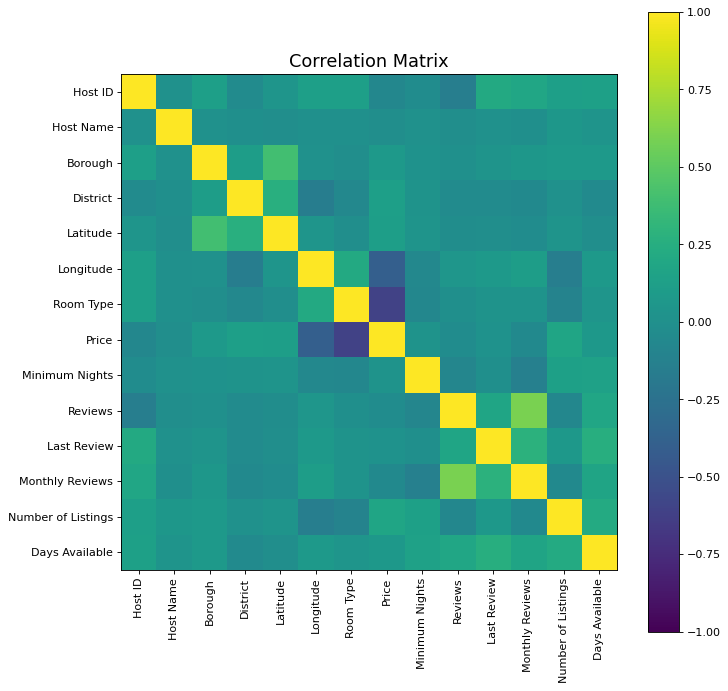

In [ ]:
import matplotlib.pyplot as plt

corr_df = final.copy()

# Remove rows which have any missing value in its features
corr_df = corr_df.dropna(axis='index')
corr_df = corr_df[[col for col in corr_df if corr_df[col].nunique() > 1]]

if corr_df.shape[1] < 2:
    exit()

corr = corr_df.corr()
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
corr_mat = plt.matshow(corr, fignum=1)

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corr_mat)

# -1: weak relationship | 0: neutral relationship | 1: strong relationship
plt.clim(-1, 1)
plt.title(f'Correlation Matrix', fontsize=16)

plt.savefig(f'{getcwd()}/../plots/preprocess_correlation_matrix.svg', format='svg')
plt.show()

# **7. Storing Encodings for Predictions**

- To be able to properly preprocess new instances in prediction, we need to store the categorical features encodings in a key-value format (e.g., {'Manhattan': 0, 'Brooklyn': 1, ...});
- This way, we can access the corresponding numerical value to a given label in prediction, since most of ML algorithms doesn't support categorical values.

In [35]:
# Custom encoder to write int64 into JSON (serializable)
class CustomEncoder(json.JSONEncoder):

    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)

        return super(CustomEncoder, self).default(obj)


def generate_encodings(df: pd.DataFrame) -> None:

    # Unused features and target
    df = df.drop(['ID', 'Name', 'Price'], axis='columns')

    # Reducing Last Review cardinality
    df['Last Review'] = pd.to_datetime(df['Last Review'])
    df['Last Review'] = df['Last Review'].apply(lambda row: f'{str(row.year)}-{str(row.month)}')

    # Reapplying null values and category type (necessary for adding categories)
    df['Last Review'] = df['Last Review'].astype('category')
    df = df.replace({'Last Review': {'nan-nan': np.nan}})

    # Filling missing values
    df['Last Review'] = df['Last Review'].cat.add_categories('N/A')
    df['Last Review'] = df['Last Review'].fillna('N/A')
    df['Monthly Reviews'] = df['Monthly Reviews'].fillna(0)

    # Discarding rows with missing values (at this point, only Host Name column has)
    df = df.dropna(axis='index', subset='Host Name')

    matches = dict()
    encoder = LabelEncoder()
    for col in df.columns.values:

        # Discretizes only categorical features
        if not is_float_dtype(df[col]) and not is_integer_dtype(df[col]):
            encoder.fit(df[col])

            # Stores each column mapping (<categorical label>: <encoded number>)
            col_matches = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
            matches[col] = col_matches

    with open(f'{getcwd()}/../models/matches.json', 'w') as json_file:
        # ASCII to deal with distinct data (e.g., japanese characters, emojis, ...)
        matches_file = json.dumps(matches, indent=4, cls=CustomEncoder, ensure_ascii=False)
        json_file.write(matches_file)


encode_dataset = pd.read_parquet(f'{getcwd()}/../datasets/reduced.parquet')
generate_encodings(df=encode_dataset)